In [2]:
import numpy as np
import matplotlib.pyplot as plt
from KDE import KDE
%matplotlib inline

<a list of 50 Patch objects>

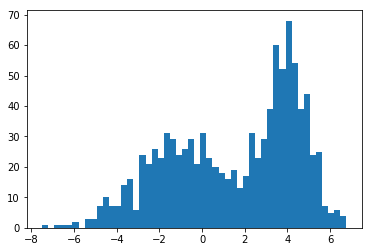

In [3]:
# assume the true data generating processes consists of two gaussians
x1 = np.random.normal(loc=-1.0, scale=2.0, size=500)
x2 = np.random.normal(loc=4.0, scale=1.0, size=500)
X = np.concatenate([x1, x2])
plt.hist(X, bins = 50)[2]  # density for true data generating function

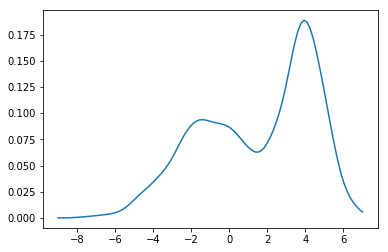

In [4]:
# lets fit KDE to observations
K = KDE()
d = K.fit(observations=X, low=-9, high=7, size=100, bandwidth=.5)
plt.plot(np.linspace(-9, 7, 100), d)  # KDE is able to approximate true data generating process

array([ 1.,  0.,  1.,  1.,  1.,  2.,  0.,  3.,  3.,  7., 10.,  7.,  7.,
       14., 16.,  6., 24., 21., 26., 23., 31., 29., 24., 26., 29., 21.,
       31., 23., 20., 18., 16., 19., 13., 17., 31., 23., 29., 39., 60.,
       52., 68., 54., 39., 44., 24., 25.,  7.,  5.,  6.,  4.])

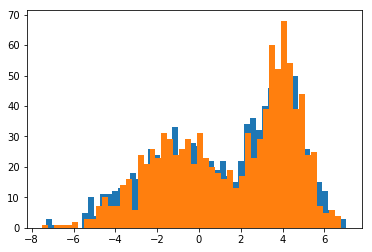

In [5]:
# now that we've fitted KDE, we could sample from it... a good KDE can approximate the true process
y = K.sample(size=1000)  # sample from KDE
plt.hist(y, bins = 50)[0]
plt.hist(X, bins = 50)[0]